In [24]:
from IPython.display import display
import urllib3
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
#TODO Remember to save out your dataframes to a data folder in case things change on website. Do this for the other one too!

In [4]:
def fetchWebpage(dataurl):
    #Get webpage html data
    http = urllib3.PoolManager()
    res = http.request('GET', dataurl)
    rawhtml = res.data.decode('utf-8')
    return rawhtml;

In [5]:
url = "http://amphibiaweb.org/cgi/amphib_ws_locality?orderbyaw=Order&rel-isocc=eq&where-isocc=MG"
dat = fetchWebpage(url)
tree = ET.fromstring(dat)

In [14]:
amphibArray = []
for species in list(tree):
    amphibArray.append({attr.tag: attr.text for attr in species})
df = pd.DataFrame(amphibArray)
sciname = df["scientificname"]
df["genus"] = sciname.apply(lambda x : x.split()[0])
df["species"] = sciname.apply(lambda x : x.split()[1])
display(df.head())

,family,image,iucn_uuid,order,scientificname,sound,genus,species
0,Hyperoliidae,1111 1111 1111 2376,56096,Anura,Heterixalus alboguttatus,http://amphibiaweb.org/sounds/Heterixalus_albo...,Heterixalus,alboguttatus
1,Hyperoliidae,1111 1111 1111 1129,56097,Anura,Heterixalus andrakata,http://amphibiaweb.org/sounds/Heterixalus_andr...,Heterixalus,andrakata
2,Hyperoliidae,1111 1111 1111 8015,56098,Anura,Heterixalus betsileo,http://amphibiaweb.org/sounds/Heterixalus_bets...,Heterixalus,betsileo
3,Hyperoliidae,1111 1111 1111 1166,56099,Anura,Heterixalus boettgeri,http://amphibiaweb.org/sounds/Heterixalus_boet...,Heterixalus,boettgeri
4,Hyperoliidae,1111 1111 1111 8017,56100,Anura,Heterixalus carbonei,http://amphibiaweb.org/sounds/Heterixalus_carb...,Heterixalus,carbonei


In [48]:
iucnrawdata = pd.read_table("amphibdat.txt")
mergedf = pd.merge(df, iucnrawdata, how="left", left_on="scientificname", right_on="gaa_name")
display(mergedf.head())
familyct = pd.DataFrame(df["family"].value_counts());
totalct = len(df.index)
orderct = pd.DataFrame(df["order"].value_counts())
genusct = pd.DataFrame(mergedf["genus_x"].value_counts())
print("Counts of Species Taxanomic Orders:")
display(orderct)
print("Counts of Species Taxanomic Families:")
display(familyct)
print("Counts of Top 5 Species Taxanomic Genuses:")
display(genusct.head())

,family_x,image,iucn_uuid,order_x,scientificname,sound,genus_x,species_x,order_y,family_y,...,common_name,gaa_name,synonymies,itis_names,iucn,isocc,intro_isocc,aweb_uid,uri/guid,taxon_notes_public
0,Hyperoliidae,1111 1111 1111 2376,56096,Anura,Heterixalus alboguttatus,http://amphibiaweb.org/sounds/Heterixalus_albo...,Heterixalus,alboguttatus,Anura,Hyperoliidae,...,NaN,Heterixalus alboguttatus,NaN,NaN,Least Concern (LC),MG,NaN,486,http://amphibiaweb.org/species/486,NaN
1,Hyperoliidae,1111 1111 1111 1129,56097,Anura,Heterixalus andrakata,http://amphibiaweb.org/sounds/Heterixalus_andr...,Heterixalus,andrakata,Anura,Hyperoliidae,...,NaN,Heterixalus andrakata,NaN,NaN,Least Concern (LC),MG,NaN,487,http://amphibiaweb.org/species/487,NaN
2,Hyperoliidae,1111 1111 1111 8015,56098,Anura,Heterixalus betsileo,http://amphibiaweb.org/sounds/Heterixalus_bets...,Heterixalus,betsileo,Anura,Hyperoliidae,...,NaN,Heterixalus betsileo,NaN,NaN,Least Concern (LC),MG,NaN,488,http://amphibiaweb.org/species/488,NaN
3,Hyperoliidae,1111 1111 1111 1166,56099,Anura,Heterixalus boettgeri,http://amphibiaweb.org/sounds/Heterixalus_boet...,Heterixalus,boettgeri,Anura,Hyperoliidae,...,NaN,Heterixalus boettgeri,NaN,NaN,Least Concern (LC),MG,NaN,489,http://amphibiaweb.org/species/489,NaN
4,Hyperoliidae,1111 1111 1111 8017,56100,Anura,Heterixalus carbonei,http://amphibiaweb.org/sounds/Heterixalus_carb...,Heterixalus,carbonei,Anura,Hyperoliidae,...,NaN,Heterixalus carbonei,NaN,NaN,Near Threatened (NT),MG,NaN,6138,http://amphibiaweb.org/species/6138,NaN


Counts of Species Taxanomic Orders:


,order
Anura,306


Counts of Species Taxanomic Families:


,family
Mantellidae,210
Microhylidae,85
Hyperoliidae,11


Counts of Top 5 Species Taxanomic Genuses:


,genus_x
Boophis,77
Gephyromantis,40
Mantidactylus,31
Stumpffia,16
Mantella,16


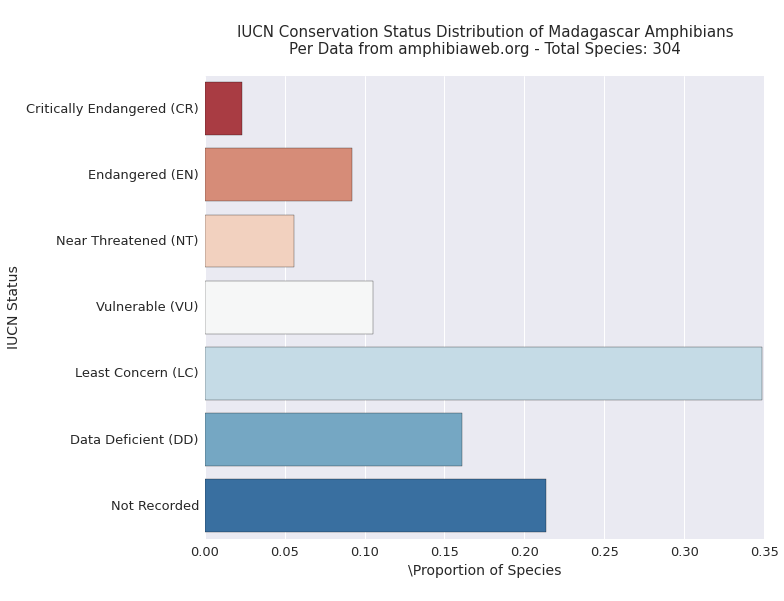

In [37]:
iucnorder = ["Not Recorded", "Data Deficient (DD)", "Least Concern (LC)", "Vulnerable (VU)", "Near Threatened (NT)", "Endangered (EN)", "Critically Endangered (CR)"]
plotdat = pd.DataFrame(mergedf["iucn"].fillna("Not Recorded").value_counts())
plt.figure(figsize=(11, 8.5))
sns.barplot(y=plotdat.index, x=plotdat[0]/totalct, order=reversed(iucnorder), palette="RdBu")
plt.title("\nIUCN Conservation Status Distribution of Madagascar Frogs\nPer Data from amphibiaweb.org - Total Species: "+str(totalct)+"\n", fontsize=15)
plt.xlabel("\Proportion of Species\n", fontsize=14)
plt.ylabel("IUCN Status", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/amphibIUCN.png")

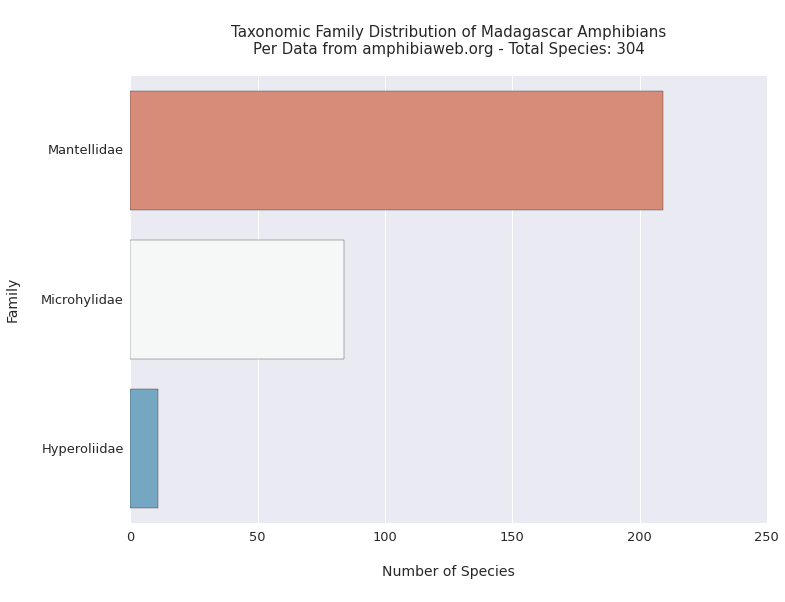

In [35]:
plt.figure(figsize=(11, 8.5))
sns.barplot(y=familyct.index, x=familyct[0], palette="RdBu")
plt.title("\nTaxonomic Family Distribution of Madagascar Frogs\nPer Data from amphibiaweb.org - Total Species: "+str(totalct)+"\n", fontsize=15)
plt.xlabel("\nNumber of Species\n", fontsize=14)
plt.ylabel("Family\n", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/amphibFamily.png")

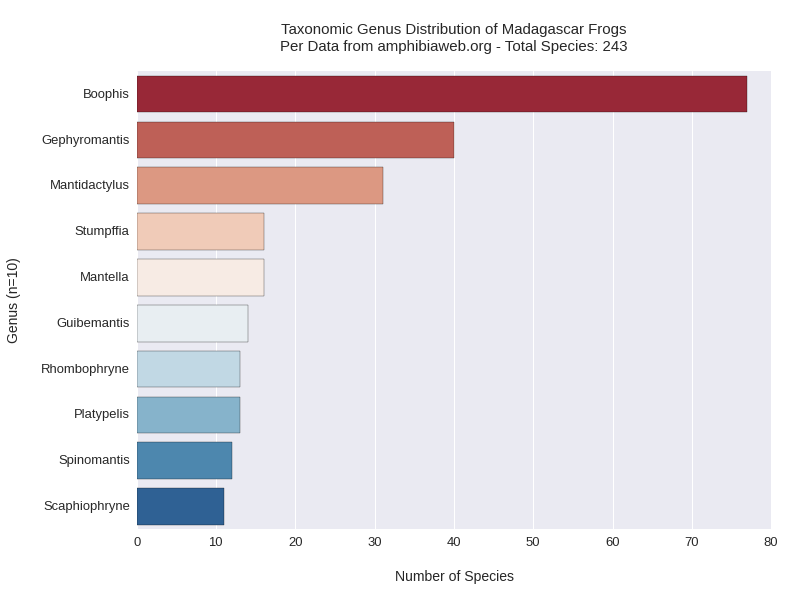

In [57]:
genusData = pd.DataFrame(df["genus"].value_counts()[0:10])
plt.figure(figsize=(11, 8.5))
sns.barplot(y=genusData.index, x=genusData["genus"], palette="RdBu")
plt.title("\nTaxonomic Genus Distribution of Madagascar Frogs\nPer Data from amphibiaweb.org - Total Genuses: "+str(sum(genusData["genus"]))+"\n", fontsize=15)
plt.xlabel("\nNumber of Species\n", fontsize=14)
plt.ylabel("Genus (n="+str(len(genusData["genus"]))+")\n", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/mantellidaeGenus.png")

In [49]:
microGenusData = pd.DataFrame(df[df["family"]=="Microhylidae"]["genus"].value_counts())